## 初期設定

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

## 画像の読み込み

In [9]:
img = cv2.cvtColor(cv2.imread('./img/test1.jpg'), cv2.COLOR_BGR2RGB)
mask_img = cv2.imread('./img/mask.jpg')
src_img = cv2.cvtColor(cv2.bitwise_and(img, mask_img), cv2.COLOR_RGB2GRAY)

## 画像表示関数の定義

In [1]:
def show_img(img, cmap=None):
    if cmap == 'gray':
        cvt_img = img.copy()
    else:
        cvt_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cvt_img, cmap)
    plt.show()

## ハフ変換による円の抽出

<IPython.core.display.Javascript object>


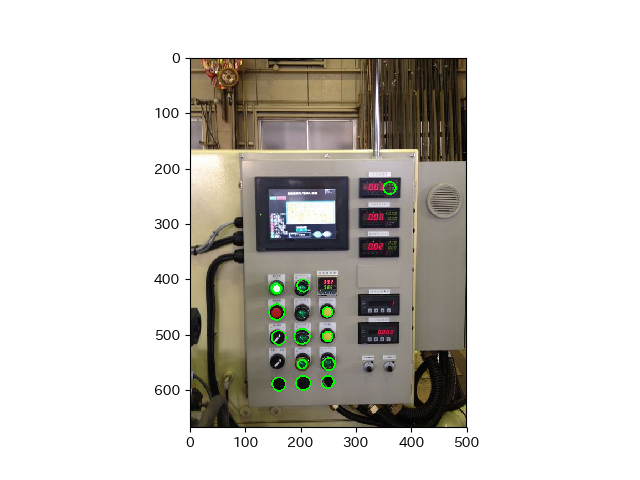

In [11]:
circles = cv2.HoughCircles(src_img,cv2.HOUGH_GRADIENT,1,25,
                            param1=50,param2=30,minRadius=0,maxRadius=22)

circles = np.uint16(np.around(circles))
dst_img = img.copy()
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(dst_img,(i[0],i[1]),i[2],(0,255,0),2)

plt.imshow(dst_img)
plt.show()

## ラベリング処理による抽出領域のラベリング

<IPython.core.display.Javascript object>


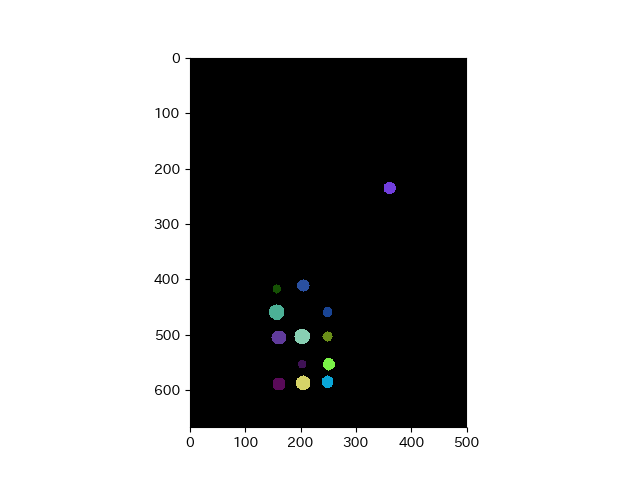

In [14]:
H, W, ch = dst_img.shape
circles_img = np.zeros((H, W), dtype=np.uint8)
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(circles_img,(i[0],i[1]),i[2],(255, 255, 255),-1)

labels, label_img = cv2.connectedComponents(circles_img)
rgbs = np.random.randint(0,255,(labels+1,3))
labeld_img = np.zeros((H, W, ch), dtype=np.uint8)
for y in range(H):
    for x in range(W):
        if label_img[y, x] > 0:
            labeld_img[y, x] = rgbs[label_img[y, x]]
plt.imshow(labeld_img)
plt.show()

## マスク処理による領域の抽出

<IPython.core.display.Javascript object>


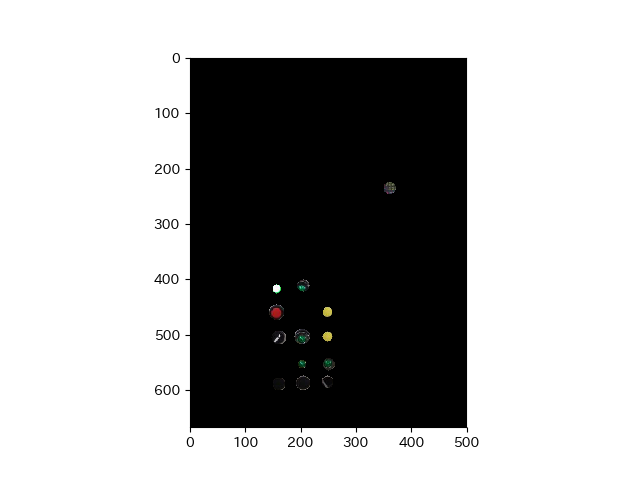

In [16]:
masked_label_img = np.zeros((label_img.shape), dtype=np.uint8)
masked_label_img[label_img > 0] = 255
masked_label_img
detect_img = cv2.bitwise_and(img, img, mask=masked_label_img)
plt.imshow(detect_img)
plt.show()